<a href="https://colab.research.google.com/github/Vivekchavda1374/ML/blob/main/Exp_4_Logistic_Regression_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To understand the logistic Regression that includes non-linearity to linear regression

In [ ]:
# 1.Load the basic libraries and packages\

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# 2.    Load the dataset

data = pd.read_csv("https://raw.githubusercontent.com/nishithkotak/machine-learning/master/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
103,1,81,72,18,40,26.6,0.283,24,0
104,2,85,65,0,0,39.6,0.930,27,0
105,1,126,56,29,152,28.7,0.801,21,0
106,1,96,122,0,0,22.4,0.207,27,0


In [ ]:
# 3.    Analyze the dataset

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,108.00000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,4.37037,118.194444,68.592593,19.120370,71.916667,30.870370,0.472815,33.833333,0.351852
std,3.56932,33.399160,22.038215,16.289276,123.098860,9.412373,0.371791,11.086322,0.479774
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102000,21.000000,0.000000
25%,1.00000,98.500000,64.000000,0.000000,0.000000,25.300000,0.248000,24.750000,0.000000
50%,4.00000,113.500000,72.000000,20.000000,0.000000,31.350000,0.339500,31.000000,0.000000
75%,7.00000,139.500000,80.000000,32.000000,110.000000,37.225000,0.586250,41.000000,1.000000
max,15.00000,197.000000,122.000000,60.000000,846.000000,49.700000,2.288000,60.000000,1.000000


In [ ]:
# 4.    Normalize the data

def Feature_Normalization(X):
  X = (X - np.mean(X , axis = 0)) / np.std(X , axis = 0)
  return X , np.mean(X , axis = 0) ,  np.std(X , axis = 0)

In [ ]:
# 5.    Pre-process the data

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

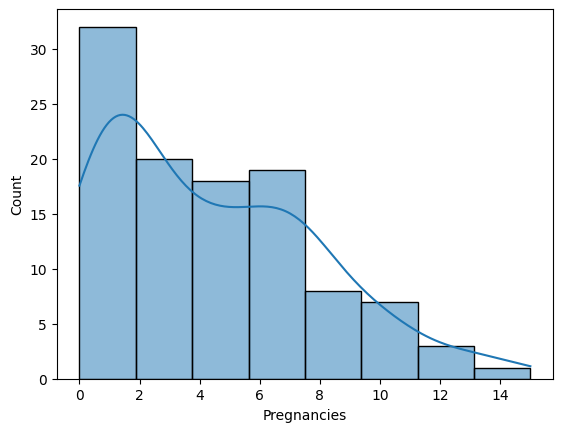

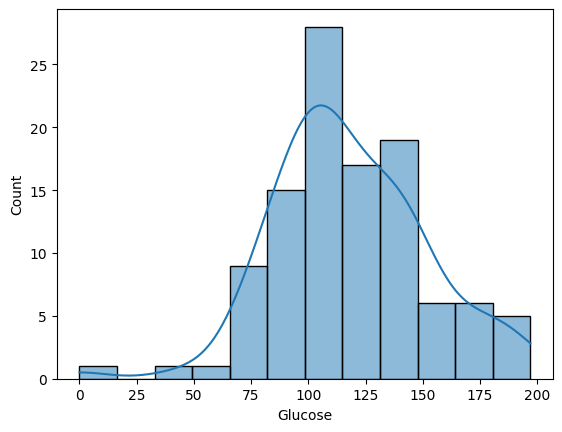

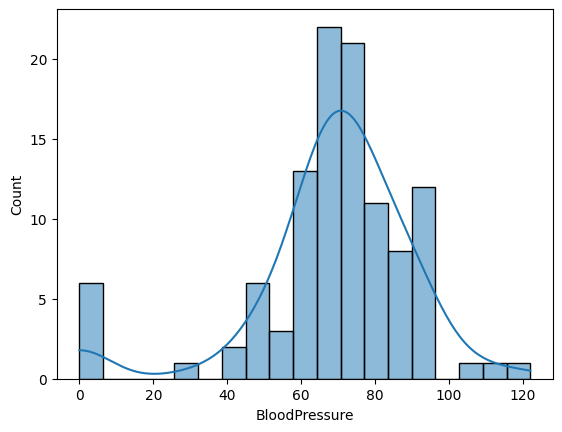

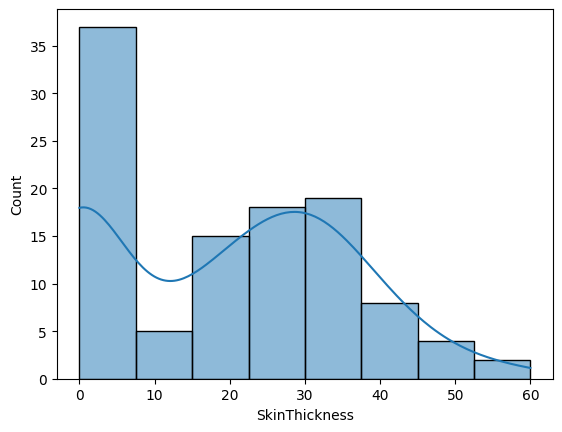

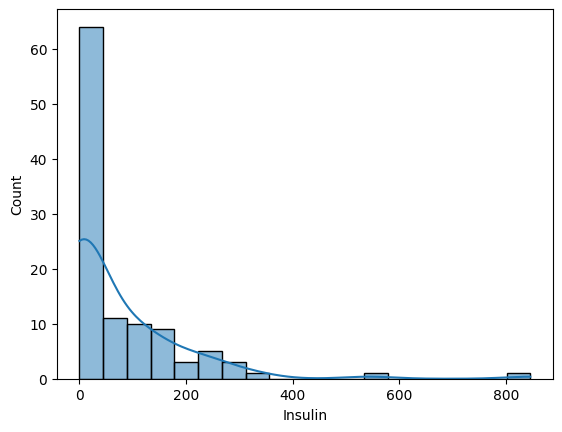

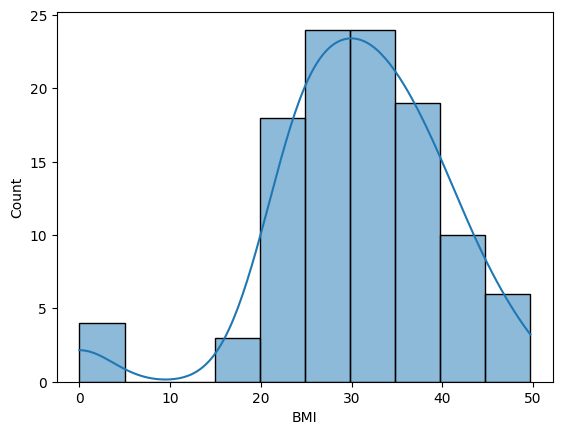

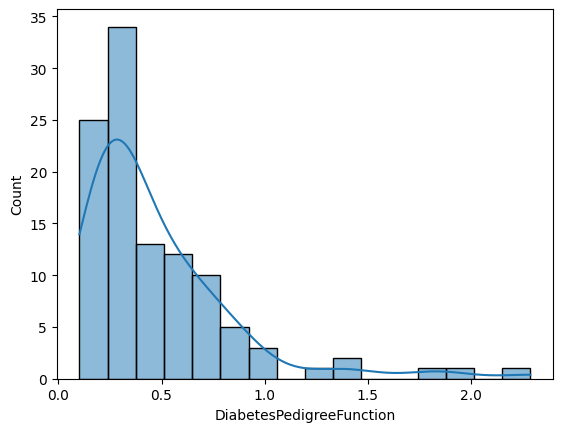

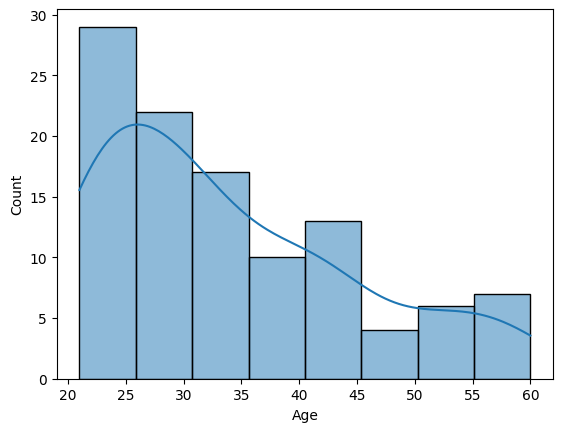

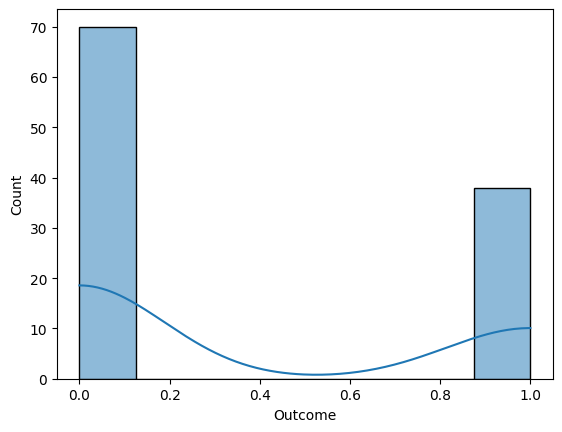

In [ ]:
# 6.	Visualize the Data

for feature in data.columns:
    sns.histplot(data[feature], kde=True)
    plt.show()


In [ ]:
# 7.Separate the feature and prediction value columns

x = data.iloc[: , :-1].values
y = data.iloc[: , -1].values

In [ ]:
def Sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# 8.    Write the Hypothesis Function

def Hypothesis(theta, X):
    return Sigmoid(np.dot(X, theta))

In [ ]:
# 9. Write the Cost Function

def Cost_function(theta, X, y):
    m = len(y)  # number of training examples
    h = Sigmoid(np.dot(X, theta))  # hypothesis (predicted probabilities)
    cost = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
    return cost

In [ ]:
# 10.   Write the Gradient Descent optimization algorithm

def Gradient_Descent(X, y, theta_array, alpha, epochs):
    m = len(y)
    cost_history = []

    for i in range(epochs):
        h = Sigmoid(np.dot(X, theta_array))
        gradient = (1/m) * np.dot(X.T, (h - y))
        theta_array = theta_array - alpha * gradient
        cost = Cost_function(theta_array, X, y)
        cost_history.append(cost)

    return theta_array, cost_history

In [ ]:
# 11.   Apply Feature Normalization technique over the data

x_train , train_mean , train_std = Feature_Normalization(x_train)
x_test , test_mean , test_std = Feature_Normalization(x_test)

In [ ]:
# 12.   Apply the training over the dataset to minimize the loss

def Training(X, y, alpha, epochs):
    theta_array = np.zeros(X.shape[1])  # Initialize theta as a zero array with shape matching the number of features
    cost_history = []

    for i in range(epochs):
        theta_array, cost_history = Gradient_Descent(X, y, theta_array, alpha, epochs)

    return theta_array, cost_history

In [ ]:
# Apply the Logistics Regression

alpha = 0.001
epochs = 100
theta_array , cost_history = Training(x_train  , y_train , alpha , epochs)

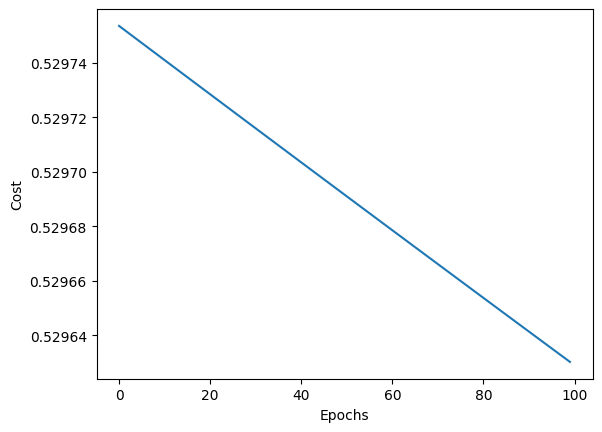

In [ ]:
# 13.   Observe the cost function vs iterations learning curve

x = np.arange(0, epochs)
plt.plot(x, cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()